# Initial data rules

In [595]:
import numpy as np
import pandas as pd
from pathlib import Path


size_predictor_name = 'jeans_indigo_old'
waist_rules = [
    [60., 65.9, '0'],      # 0 | 60 - 65
    [66., 71.9, '2'],       # 1 | 66 - 71
    [72., 80.9, '4'],       # 2 | 72 - 80
    [81., 87.9, '6'],       # 3 | 81 - 87
    [88., 97.9, '8'],       # 4 | 88 - 97
    [98., 106.9, '10'],    # 5 | 98 - 106
    [107., 114.9, '12'],     # 6 | 107 - 114
    [115., 121., '16'],     # 7 | 115 - 120
]

hips_rules = [
    [85., 90.9, '6'],       # 0 | 85 - 90
    [91., 96.9, '8'],       # 1 | 91 - 96
    [97., 104.9, '10'],    # 2 | 97 - 104
    [105., 108.9, '12'],    # 3 | 105 - 108
    [109., 113.9, '14'],    # 4 | 109 - 113
    [114., 117.9, '16'],   # 5 | 114 - 117
    [118., 122.9, '18'],     # 6 | 118 - 122
    [123., 127., '20'],    # 7 | 123 - 126
]

size_rules = [
    [waist_rules[0], hips_rules[0], '0-6'],
    [waist_rules[0], hips_rules[1], '0-8'],
    [waist_rules[1], hips_rules[0], '2-6'],
    [waist_rules[1], hips_rules[1], '2-8'],
    [waist_rules[1], hips_rules[2], '2-10'],
    [waist_rules[1], hips_rules[3], '2-12'],
    [waist_rules[2], hips_rules[2], '4-10'],
    [waist_rules[2], hips_rules[3], '4-12'],
    [waist_rules[2], hips_rules[4], '4-14'],
    [waist_rules[3], hips_rules[4], '6-14'],
    [waist_rules[4], hips_rules[4], '8-14'],
    [waist_rules[5], hips_rules[5], '10-16'],
    [waist_rules[5], hips_rules[6], '10-18'],
    [waist_rules[6], hips_rules[5], '12-16'],
    [waist_rules[6], hips_rules[6], '12-18'],
    [waist_rules[7], hips_rules[7], '16-20'],
]

size_data = []

# Generate table from size rules

In [596]:
for rule in size_rules:
    waist_range = rule[0]
    hips_range = rule[1]
    current_size = rule[2]
    w_range = np.arange(waist_range[0], waist_range[1], 0.25)
    h_range = np.arange(hips_range[0], hips_range[1], 0.25)
    for w in w_range:
        for h in h_range:
            wh_data = [
                w,
                h,
                current_size,
            ]
            size_data.append(wh_data)


# Save data generated

In [597]:
df = pd.DataFrame(size_data)
df.rename(columns={0: 'waist', 1: 'hips', 2: 'size'}, inplace=True)
df.dropna(axis=1, inplace=True)
df = df.drop_duplicates()
table_name = f"../../generated/tables/{size_predictor_name}.csv"
filepath = Path(table_name)
filepath.parent.mkdir(parents=True, exist_ok=True)
df.to_csv(filepath, encoding='utf-8', index=False)


# Describe data-set

In [598]:
df.describe()

,waist,hips
count,10096.000000,10096.000000
mean,83.726823,106.482765
std,17.261658,10.939790
min,60.000000,85.000000
25%,69.500000,97.750000
50%,77.750000,108.250000
75%,100.000000,115.000000
max,120.750000,126.750000


# Expand data for accuracy

In [599]:
df["hips-squared"] = df["hips"] * df["hips"]


In [600]:
df.shape


(10096, 4)

In [601]:
from decimal import Decimal


def round_decimal(value):
    return float(Decimal(value).quantize(Decimal('0.01')))


In [602]:
df['hips-squared'] = df['hips-squared'].apply(round_decimal)


In [603]:
df.head()


,waist,hips,size,hips-squared
0,60.0,85.00,0-6,7225.00
1,60.0,85.25,0-6,7267.56
2,60.0,85.50,0-6,7310.25
3,60.0,85.75,0-6,7353.06
4,60.0,86.00,0-6,7396.00


# Clean data-set

In [604]:
df.dropna(how='any').shape


(10096, 4)

In [605]:
df.duplicated().sum()


0

In [606]:
df.drop_duplicates(keep='first').shape


(10096, 4)

In [607]:
df.drop_duplicates(keep=False).shape


(10096, 4)

In [608]:
df.loc[df.duplicated(keep='last'), :]


,waist,hips,size,hips-squared


In [609]:
df.dropna(subset=['waist', 'hips', 'hips-squared', 'size'], how='any').shape

(10096, 4)

In [610]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 10096 entries, 0 to 10095
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   waist         10096 non-null  float64
 1   hips          10096 non-null  float64
 2   size          10096 non-null  object 
 3   hips-squared  10096 non-null  float64
dtypes: float64(3), object(1)
memory usage: 394.4+ KB


In [611]:
df.columns


Index(['waist', 'hips', 'size', 'hips-squared'], dtype='object')

In [612]:
df.columns.to_series().groupby(df.dtypes).groups


{float64: ['waist', 'hips', 'hips-squared'], object: ['size']}

In [613]:
df.isnull().sum()


waist           0
hips            0
size            0
hips-squared    0
dtype: int64

In [614]:
df.nunique()

waist           244
hips            168
size             16
hips-squared    168
dtype: int64

In [615]:
df.notnull().head()


,waist,hips,size,hips-squared
0,True,True,True,True
1,True,True,True,True
2,True,True,True,True
3,True,True,True,True
4,True,True,True,True


In [616]:
df.apply(lambda x: x.dtype)


waist           float64
hips            float64
size             object
hips-squared    float64
dtype: object

In [617]:
total_miss = df.isnull().sum()
perc_miss = total_miss/df.isnull().count()*100

missing_data = pd.DataFrame({'Total missing':total_miss,'% missing':perc_miss})

missing_data.sort_values(by='Total missing',ascending=False).head(3)

,Total missing,% missing
waist,0,0.0
hips,0,0.0
size,0,0.0


In [618]:
print('Unique Values for Each Feature:')
for i in df.columns:
    print(i, ':',df[i].nunique()) 

Unique Values for Each Feature:
waist : 244
hips : 168
size : 16
hips-squared : 168


In [619]:
# find the unique values from categorical features
for col in df.select_dtypes(include='object').columns:
    print(col)
    print(df[col].unique())


size
['0-6' '0-8' '2-6' '2-8' '2-10' '2-12' '4-10' '4-12' '4-14' '6-14' '8-14'
 '10-16' '10-18' '12-16' '12-18' '16-20']


In [620]:
# select_dtypes selects data with numeric features
numerical_data = df.select_dtypes(include=np.number)
numerical_col = numerical_data.columns

print("Numeric Features:")
print(numerical_data.head())


Numeric Features:
   waist   hips  hips-squared
0   60.0  85.00       7225.00
1   60.0  85.25       7267.56
2   60.0  85.50       7310.25
3   60.0  85.75       7353.06
4   60.0  86.00       7396.00


In [621]:
# we will exclude data with numeric features
categorical_data = df.select_dtypes(exclude=np.number)
# we will store the categorical features in a variable
categorical_col = categorical_data.columns

print("Categorical Features:")
print(categorical_data.head())


Categorical Features:
  size
0  0-6
1  0-6
2  0-6
3  0-6
4  0-6


In [622]:
### numerical
numerical_cols = list(df.select_dtypes(exclude=['object']))
numerical_cols


['waist', 'hips', 'hips-squared']

In [623]:
### categorical
categorical_cols = list(df.select_dtypes(include=['object']))
categorical_cols


['size']

In [624]:
df.describe(include=object)


,size
count,10096
unique,16
top,4-10
freq,1152


In [625]:
size_series = df['size']
size_levels = size_series.unique()
size_levels


array(['0-6', '0-8', '2-6', '2-8', '2-10', '2-12', '4-10', '4-12', '4-14',
       '6-14', '8-14', '10-16', '10-18', '12-16', '12-18', '16-20'],
      dtype=object)

In [626]:
size_freq_table = pd.crosstab(index=df['size'], columns='freq')
size_freq_table


col_0,freq
size,
0-6,576
0-8,576
10-16,576
10-18,720
12-16,512
12-18,640
16-20,384
2-10,768
2-12,384


In [627]:
df.describe()


,waist,hips,hips-squared
count,10096.000000,10096.000000,10096.000000
mean,83.726823,106.482765,11458.245234
std,17.261658,10.939790,2304.420040
min,60.000000,85.000000,7225.000000
25%,69.500000,97.750000,9555.060000
50%,77.750000,108.250000,11718.060000
75%,100.000000,115.000000,13225.000000
max,120.750000,126.750000,16065.560000


In [628]:
df.corr()


,waist,hips,hips-squared
waist,1.000000,0.871682,0.884947
hips,0.871682,1.000000,0.998703
hips-squared,0.884947,0.998703,1.000000


In [629]:
# list of numerical variables
numerical_features = [feature for feature in df.columns if (
    (df[feature].dtypes != 'O') & (feature not in ['y']))]
print('Number of numerical variables: ', len(numerical_features))


Number of numerical variables:  3


In [630]:
#Discrete Numerical Features
discrete_feature = [feature for feature in numerical_features if len(
    df[feature].unique()) < 25]
print("Discrete Variables Count: {}".format(len(discrete_feature)))


Discrete Variables Count: 0


In [631]:
#Continuous Numerical Features
continuous_features = [
    feature for feature in numerical_features if feature not in discrete_feature+['deposit']]
print("Continuous feature Count: {}".format(len(continuous_features)))


Continuous feature Count: 3


# Graph analysis

In [632]:
import matplotlib.pyplot as plt


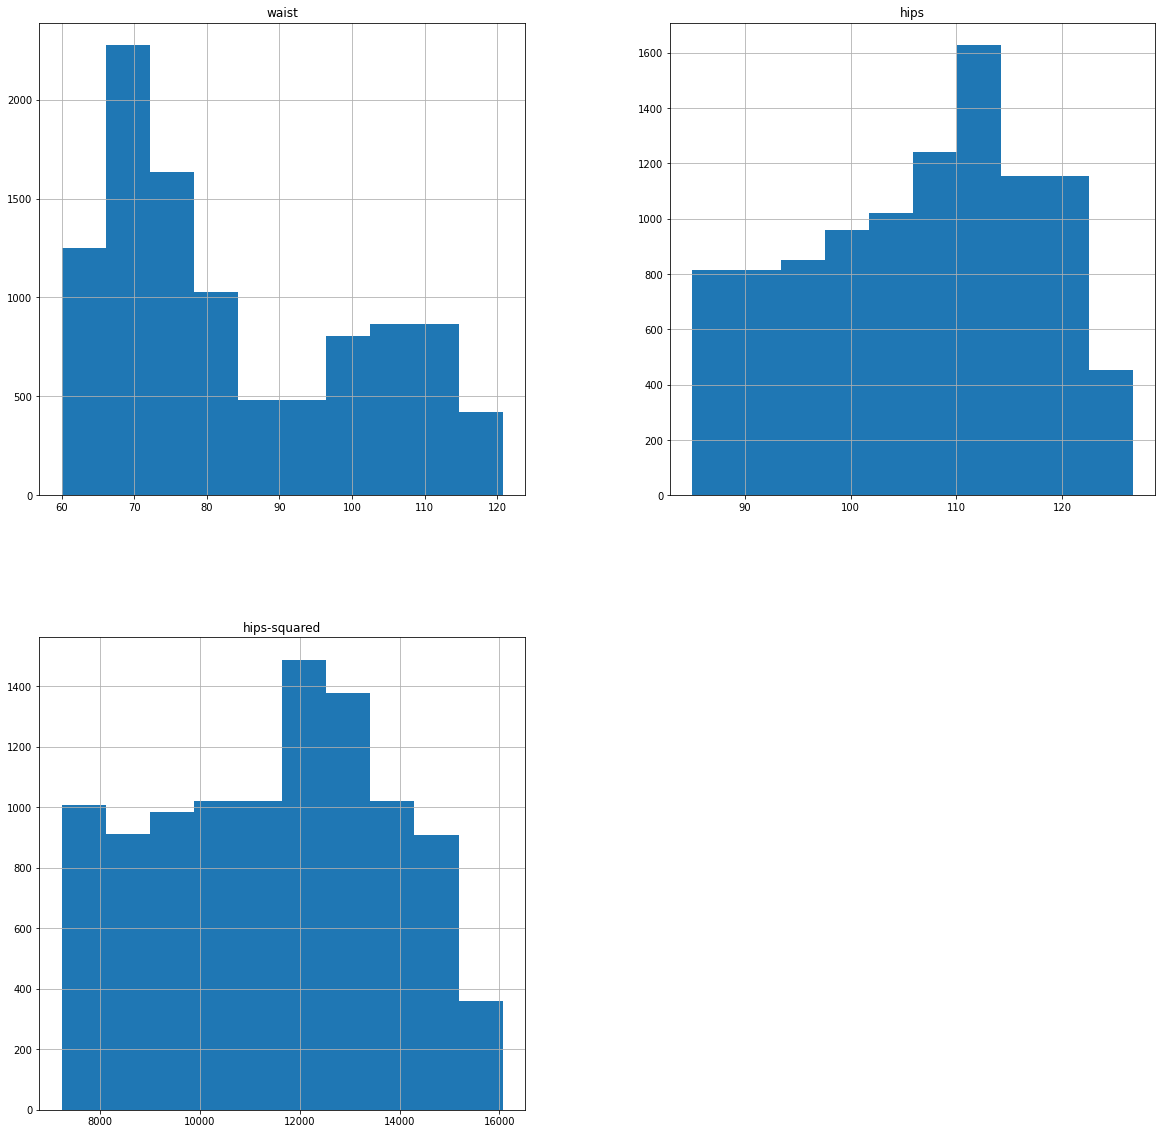

In [633]:
df.hist(figsize=(20, 20))
plt.show()


In [634]:
import seaborn as sns


<AxesSubplot:>

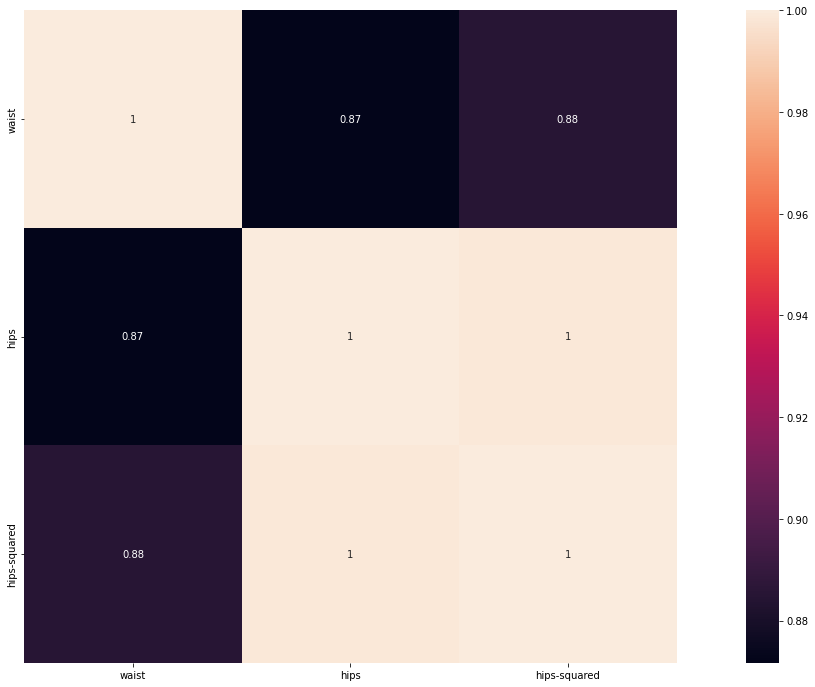

In [635]:
matrix = df.corr()
f, ax = plt.subplots(figsize=(25, 12))
sns.heatmap(matrix, square=True, annot=True)


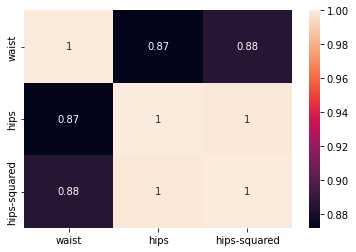

In [636]:
corr = sns.heatmap(df.corr(), annot=True)


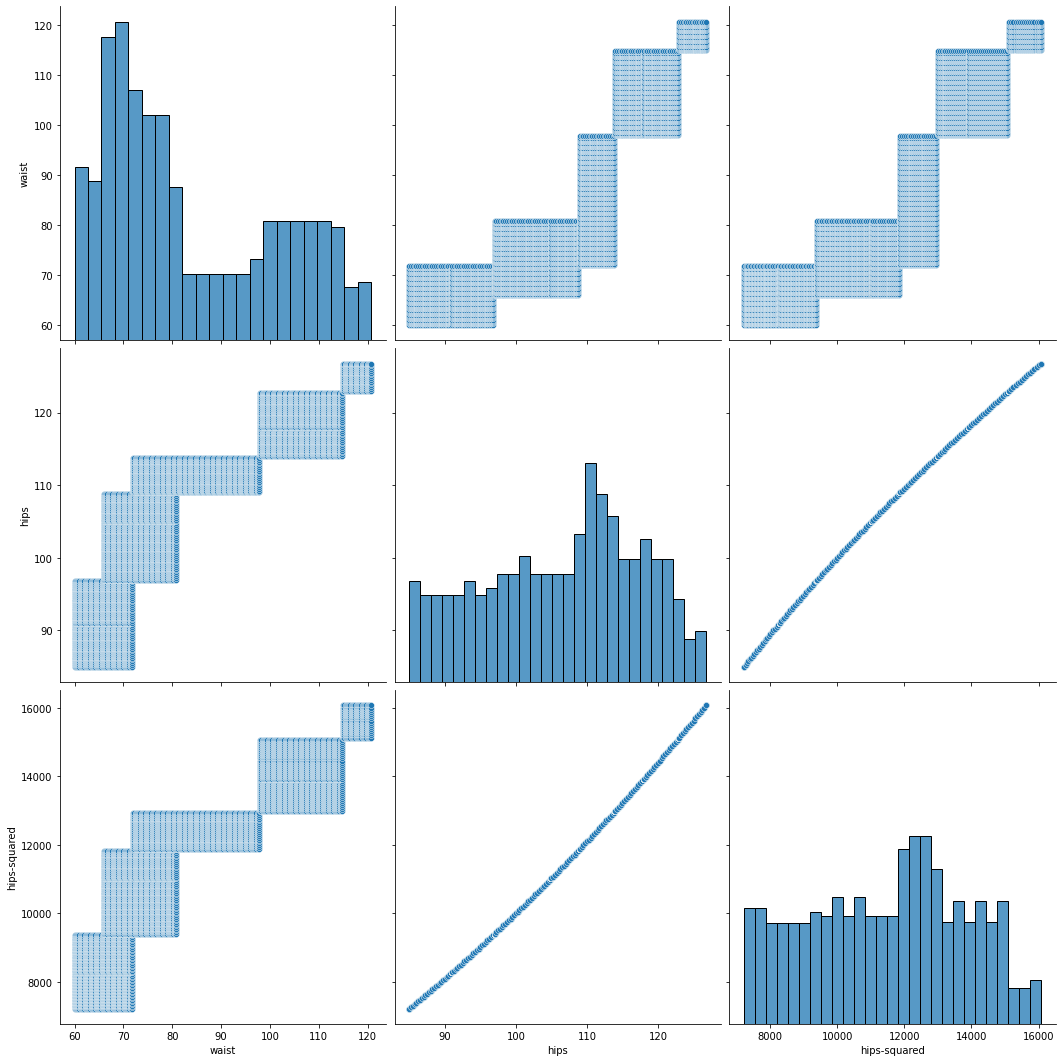

In [637]:
sns.pairplot(data=df, height=5)
plt.show()


In [638]:
def bar_plot(variable):
    var = df[variable]
    var_value = var.value_counts()
    plt.figure(figsize=(15,3))
    plt.bar(var_value.index, var_value,color=['#00008b','#00e5ee','#cd1076', '#008080','#cd5555','red','blue'])
    plt.xticks(var_value.index, var_value.index.values)
    plt.ylabel("Frequency")
    plt.title(variable)
    
    plt.show()
    print("{}: \n {}".format(variable,var_value))

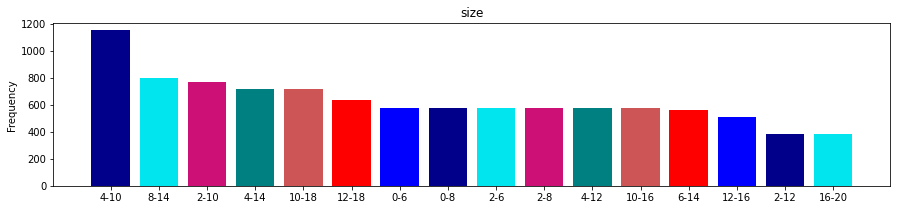

size: 
 4-10     1152
8-14      800
2-10      768
4-14      720
10-18     720
12-18     640
0-6       576
0-8       576
2-6       576
2-8       576
4-12      576
10-16     576
6-14      560
12-16     512
2-12      384
16-20     384
Name: size, dtype: int64


In [639]:
categorical_cols = ['size']
for c in categorical_cols:
    bar_plot(c)


In [640]:
df['size'].value_counts()


4-10     1152
8-14      800
2-10      768
4-14      720
10-18     720
12-18     640
0-6       576
0-8       576
2-6       576
2-8       576
4-12      576
10-16     576
6-14      560
12-16     512
2-12      384
16-20     384
Name: size, dtype: int64

<AxesSubplot:xlabel='count', ylabel='size'>

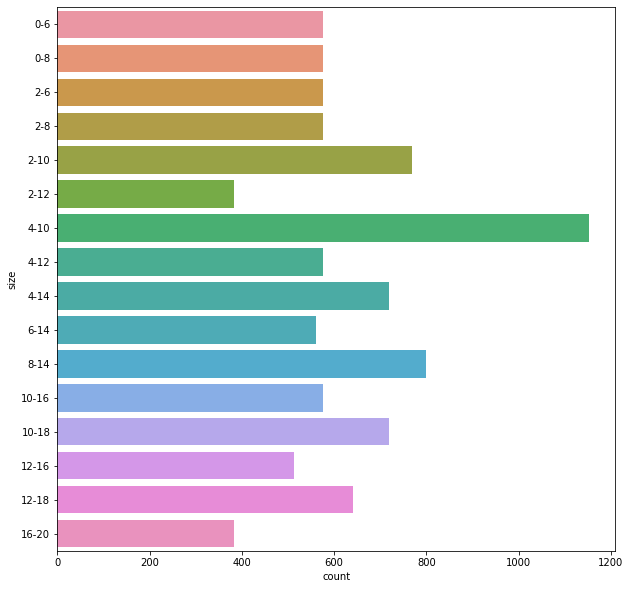

In [641]:
plt.figure(figsize=(10, 10))
sns.countplot(y=df['size'])


In [642]:
import squarify


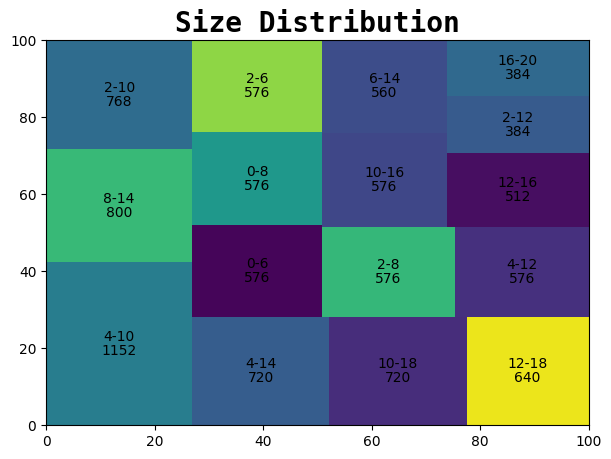

In [643]:
size = df['size'].value_counts()

plt.style.use('default')
plt.figure(figsize=(7, 5))
squarify.plot(sizes=size.values, label=size.index, value=size.values)
plt.title('Size Distribution', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.show()


# Evaluate data models 

In [644]:
df['size'] = df['size'].map({
    '0-6': 1,
    '0-8': 2,
    '2-6': 3,
    '2-8': 4,
    '2-10': 5,
    '2-12': 6,
    '4-10': 7,
    '4-12': 8,
    '4-14': 9,
    '6-14': 10,
    '8-14': 11,
    '10-16': 12,
    '10-18': 13,
    '12-16': 14,
    '12-18': 15,
    '16-20': 16,
})
df.head()


,waist,hips,size,hips-squared
0,60.0,85.00,1,7225.00
1,60.0,85.25,1,7267.56
2,60.0,85.50,1,7310.25
3,60.0,85.75,1,7353.06
4,60.0,86.00,1,7396.00


In [645]:
def int_from_decimal(value):
    return int(value)

df['size'] = df['size'].apply(int_from_decimal)
df.head()

,waist,hips,size,hips-squared
0,60.0,85.00,1,7225.00
1,60.0,85.25,1,7267.56
2,60.0,85.50,1,7310.25
3,60.0,85.75,1,7353.06
4,60.0,86.00,1,7396.00


In [646]:
df = df.dropna()
df.head()


,waist,hips,size,hips-squared
0,60.0,85.00,1,7225.00
1,60.0,85.25,1,7267.56
2,60.0,85.50,1,7310.25
3,60.0,85.75,1,7353.06
4,60.0,86.00,1,7396.00


In [647]:
df.dropna(inplace=True)
df.isnull().sum()


waist           0
hips            0
size            0
hips-squared    0
dtype: int64

In [648]:
from sklearn.linear_model import LinearRegression

# linear comparison
X_linear = df.iloc[:, 0].values.reshape(-1, 1)
y_linear = df.iloc[:, 1].values.reshape(-1, 1)
linear_regressor = LinearRegression()
linear_regressor.fit(X_linear, y_linear)
Y_pred_linear = linear_regressor.predict(X_linear)


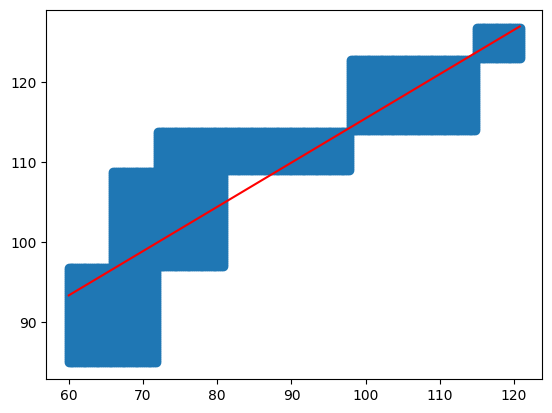

In [649]:
plt.scatter(X_linear, y_linear)
plt.plot(X_linear, Y_pred_linear, color='red')
plt.show()


In [650]:
# Features
X = df.drop("size", axis=1)

# Target
y = df["size"]


In [651]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier


In [652]:
# Splitting data into training set and validation set

X_train, X_test, y_train, y_test, = train_test_split(X, y, test_size=0.10)


In [653]:
X_train.head()


,waist,hips,hips-squared
3686,73.75,98.50,9702.25
6163,84.00,113.75,12939.06
3612,73.00,104.00,10816.00
5191,72.00,110.75,12265.56
5965,81.75,109.25,11935.56


In [654]:
len(X_train), len(X_test)


(9086, 1010)

In [655]:
# Put models in a dictionary
models_list = {
    "Logistic Regression": LogisticRegression(),
    "KNN": KNeighborsClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
}

# Create a function to fit and score models


def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
   Fits and evaluates given machine learning models.
   models: a dict of different Scikit_Learn machine learning models
   X_train: training data (no labels)
   X_test: testing data (no labels)
   y_train: training labels
   y_test: test labels
   """
    # Set random seed
    np.random.seed(18)
    # Make a dictionary to keep model scores
    model_scores = {}
    # Loop through models
    for name, model in models.items():
        # Fit model to data
        model.fit(X_train, y_train)
        # Evaluate model and append its score to model_scores
        model_scores[name] = model.score(X_test, y_test)

    return model_scores


In [656]:
model_scores_data = fit_and_score(models_list, X_train, X_test, y_train, y_test)

model_scores_data


{'Logistic Regression': 0.7504950495049505,
 'KNN': 0.9801980198019802,
 'Random Forest': 1.0,
 'Decision Tree': 1.0}

<AxesSubplot:>

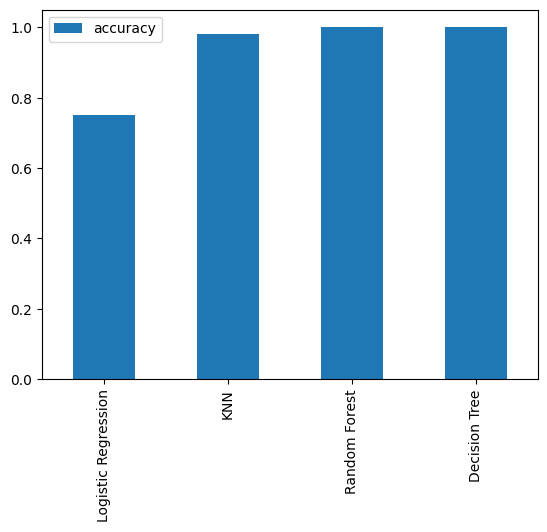

In [657]:
model_compare = pd.DataFrame(model_scores_data, index=["accuracy"])
model_compare.T.plot.bar()


# Save data cleaned

In [658]:
from pathlib import Path

clean_name = f"../../generated/clean/{size_predictor_name}.csv"
filepath = Path(clean_name)
filepath.parent.mkdir(parents=True, exist_ok=True)
df.to_csv(filepath, encoding='utf-8', index=False)
print(df.describe())

              waist          hips          size  hips-squared
count  10096.000000  10096.000000  10096.000000  10096.000000
mean      83.726823    106.482765      8.383518  11458.245234
std       17.261658     10.939790      4.366052   2304.420040
min       60.000000     85.000000      1.000000   7225.000000
25%       69.500000     97.750000      5.000000   9555.060000
50%       77.750000    108.250000      8.000000  11718.060000
75%      100.000000    115.000000     12.000000  13225.000000
max      120.750000    126.750000     16.000000  16065.560000


# Model implement (Decision Tree Classifier)

In [659]:
# Regular EDA (exploratory data analysis) and plotting libraries
import warnings
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Models from Scikit-learn

# Model Evaluations

warnings.filterwarnings('ignore')

for dirname, _, filenames in os.walk('../../generated/clean/'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


../../generated/clean/jeans_indigo_old.csv
../../generated/clean/jeans_indigo_travel.csv


In [660]:
df = pd.read_csv(r"../../generated/clean/jeans_indigo_old.csv")


<AxesSubplot:xlabel='size', ylabel='count'>

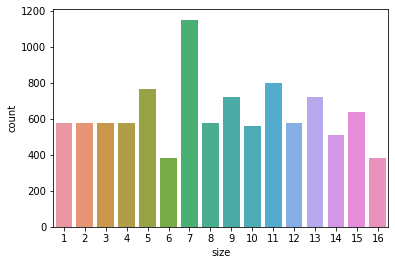

In [661]:
# Number of occurences for each size (target variable)
sns.countplot(x=df["size"])


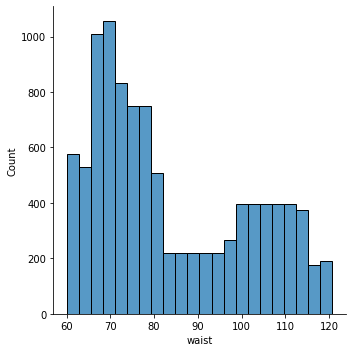

In [662]:
# Age distribution
sns.displot(df["waist"])


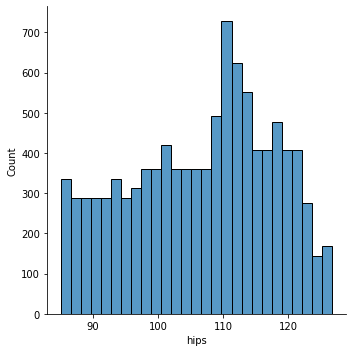

In [663]:
# Age distribution
sns.displot(df["hips"])


In [664]:
df.isna().sum()


waist           0
hips            0
size            0
hips-squared    0
dtype: int64

In [665]:
# Normalize the data
min_waist = len(df["size"].unique())


In [666]:
df

,waist,hips,size,hips-squared
0,60.00,85.00,1,7225.00
1,60.00,85.25,1,7267.56
2,60.00,85.50,1,7310.25
3,60.00,85.75,1,7353.06
4,60.00,86.00,1,7396.00
...,...,...,...,...
10091,120.75,125.75,16,15813.06
10092,120.75,126.00,16,15876.00
10093,120.75,126.25,16,15939.06
10094,120.75,126.50,16,16002.25


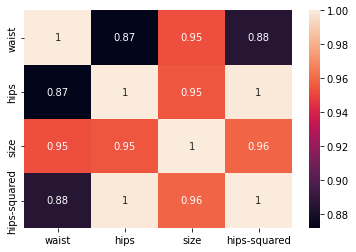

In [667]:
corr = sns.heatmap(df.corr(), annot=True)


In [668]:
# Features
X = df.drop("size", axis=1)

# Target
y = df["size"]


In [669]:
X.head()


,waist,hips,hips-squared
0,60.0,85.00,7225.00
1,60.0,85.25,7267.56
2,60.0,85.50,7310.25
3,60.0,85.75,7353.06
4,60.0,86.00,7396.00


In [670]:
y.head()


0    1
1    1
2    1
3    1
4    1
Name: size, dtype: int64

In [671]:
# Splitting data into training set and validation set

X_train, X_test, y_train, y_test, = train_test_split(X, y, test_size=0.10)


In [672]:
len(X_train), len(X_test)


(9086, 1010)

In [673]:
# Put models in a dictionary
models_list = {"Logistic Regression": LogisticRegression(),
          "KNN": KNeighborsClassifier(),
          "Random Forest": RandomForestClassifier(),
          "Decision Tree": DecisionTreeClassifier()}

# Create a function to fit and score models


def fit_and_score(models, xx_train, xx_test, yy_train, yy_test):
    """
   Fits and evaluates given machine learning models.
   models: a dict of different Scikit_Learn machine learning models
   X_train: training data (no labels)
   X_test: testing data (no labels)
   y_train: training labels
   y_test: test labels
   """
    # Set random seed
    np.random.seed(18)
    # Make a dictionary to keep model scores
    model_scores = {}
    # Loop through models
    for name, model in models.items():
        # Fit model to data
        model.fit(xx_train, yy_train)
        # Evaluate model and append its score to model_scores
        model_scores[name] = model.score(xx_test, yy_test)

    return model_scores


In [674]:
model_scores_data = fit_and_score(models_list, X_train, X_test, y_train, y_test)

model_scores_data


{'Logistic Regression': 0.7306930693069307,
 'KNN': 0.9762376237623762,
 'Random Forest': 1.0,
 'Decision Tree': 1.0}

<AxesSubplot:>

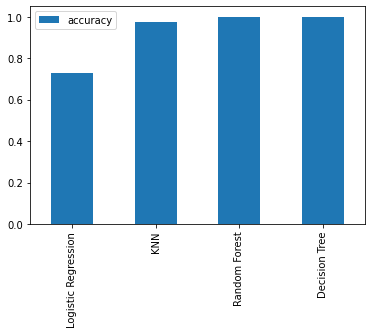

In [675]:
model_compare = pd.DataFrame(model_scores_data, index=["accuracy"])
model_compare.T.plot.bar()


In [676]:
from sklearn.linear_model import LinearRegression

# linear comparison
X_linear = df.iloc[:, 0].values.reshape(-1, 1)
y_linear = df.iloc[:, 1].values.reshape(-1, 1)
linear_regressor = LinearRegression()
linear_regressor.fit(X_linear, y_linear)
Y_pred_linear = linear_regressor.predict(X_linear)


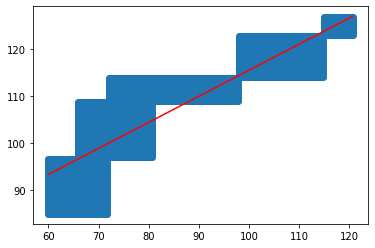

In [677]:
plt.scatter(X_linear, y_linear)
plt.plot(X_linear, Y_pred_linear, color='red')
plt.show()


In [678]:
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)


In [679]:
# Confusion matrix
print(confusion_matrix(y_test, y_pred))


[[ 54   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0  50   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0  59   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0  78   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0  70   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0  42   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0 124   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0  56   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0  69   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  68   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  74   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  61   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0  68   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0  49   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0  52 

In [680]:
# Classification report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           1       1.00      1.00      1.00        54
           2       1.00      1.00      1.00        50
           3       1.00      1.00      1.00        59
           4       1.00      1.00      1.00        78
           5       1.00      1.00      1.00        70
           6       1.00      1.00      1.00        42
           7       1.00      1.00      1.00       124
           8       1.00      1.00      1.00        56
           9       1.00      1.00      1.00        69
          10       1.00      1.00      1.00        68
          11       1.00      1.00      1.00        74
          12       1.00      1.00      1.00        61
          13       1.00      1.00      1.00        68
          14       1.00      1.00      1.00        49
          15       1.00      1.00      1.00        52
          16       1.00      1.00      1.00        36

    accuracy                           1.00      1010
   macro avg       1.00   

In [681]:
# Find feature importance of ideal model
len(clf.feature_importances_)


3

In [682]:
clf.feature_importances_


array([0.60995052, 0.24705093, 0.14299855])

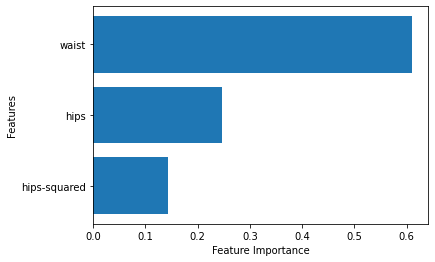

In [683]:
# Helper function for plotting feature importance
def plot_features(columns, importances, n=20):
    df = (pd.DataFrame({"features": columns,
                       "feature_importances": importances})
          .sort_values("feature_importances", ascending=False)
          .reset_index(drop=True))
    # Plot dataframe
    fix, ax = plt.subplots()
    ax.barh(df["features"][:n], df["feature_importances"][:20])
    ax.set_ylabel("Features")
    ax.set_xlabel("Feature Importance")
    ax.invert_yaxis()


plot_features(X_train.columns, clf.feature_importances_)


# Decision Tree

In [684]:
import joblib
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

# Features
X = df.drop("size", axis=1)

# Target
y = df["size"]


['../../generated/models/jeans_indigo_old.pkl']

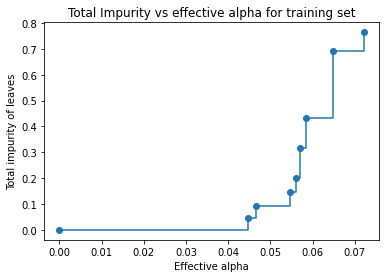

In [685]:


# Splitting data into training set and validation set
X_train, X_test, y_train, y_test, = train_test_split(X, y, test_size=0.25)


tree_classifier = DecisionTreeClassifier(random_state=0)
path = tree_classifier.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities
fig, axis = plt.subplots()
axis.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
axis.set_xlabel("Effective alpha")
axis.set_ylabel("Total impurity of leaves")
axis.set_title("Total Impurity vs effective alpha for training set")
tree_classifier.fit(X_train, y_train)
joblib.dump(tree_classifier, '../../generated/models/jeans_indigo_old.pkl')


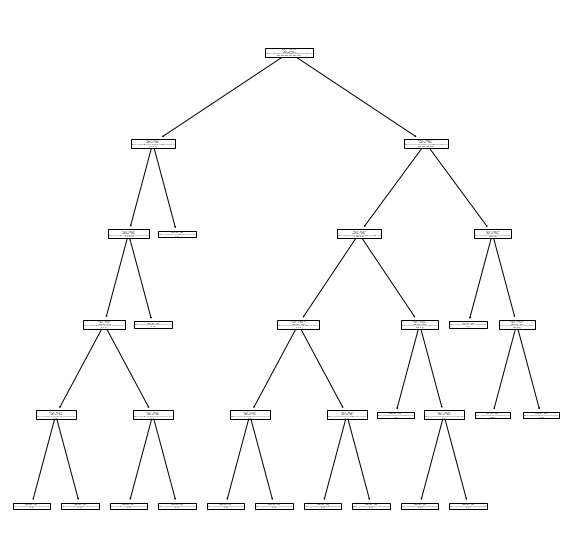

In [686]:
from sklearn import tree
fig, ax = plt.subplots(figsize=(10, 10))  # whatever size you want
tree.plot_tree(tree_classifier, ax=ax)
plt.show()


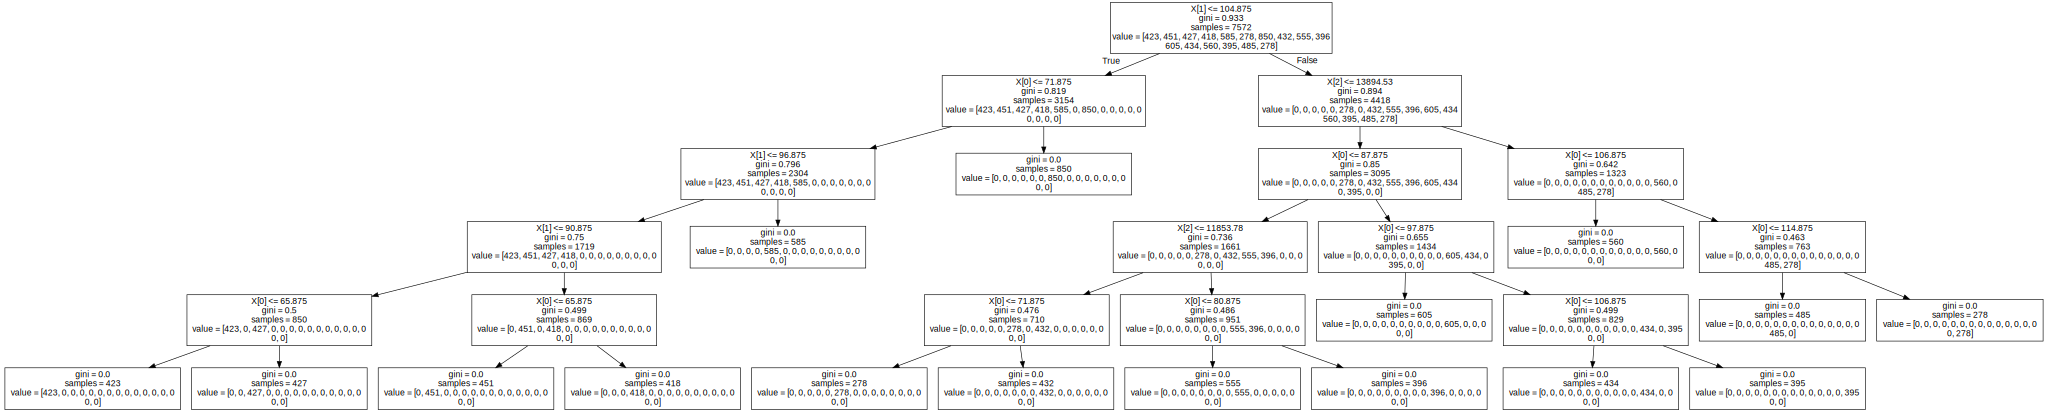

In [687]:
import graphviz
dot_data = tree.export_graphviz(tree_classifier, out_file=None)
graphs = graphviz.Source(dot_data)
graphs.render("iris")
dot_data = tree.export_graphviz(tree_classifier, out_file=None)
graphs = graphviz.Source(dot_data)
graphs


In [688]:
# Predict for 1 observation
print(X_test)
x_test_iloc = X_test.iloc[0].values.reshape(1, -1)
tree_classifier.predict(x_test_iloc)


       waist    hips  hips-squared
6268   85.50  110.00      12100.00
5661   77.75  113.25      12825.56
5357   74.00  112.25      12600.06
5252   72.75  111.00      12321.00
4962   77.50  105.50      11130.25
...      ...     ...           ...
1272   67.25   85.00       7225.00
8857  111.50  116.25      13514.06
6355   86.50  111.75      12488.06
3919   75.50  100.75      10150.56
170    61.75   85.50       7310.25

[2524 rows x 3 columns]


array([10])

In [689]:
size = [
    '0-6',
    '0-8',
    '2-6',
    '2-8',
    '2-10',
    '2-12',
    '4-10',
    '4-12',
    '4-14',
    '6-14',
    '8-14',
    '10-16',
    '10-18',
    '12-16',
    '12-18',
    '16-20',
]


In [690]:
import pandas as pd

test_brenda = [
    [69, 86],
    [74, 88],
    [72, 90],
    [65, 98],
]
df_brenda = pd.DataFrame(test_brenda, columns=['waist', 'hips'])
df_brenda['hips-squared'] = df_brenda['hips'] * df_brenda['hips']
df_brenda['hips-squared'] = df_brenda['hips-squared'].apply(round_decimal)
print(df_brenda)


   waist  hips  hips-squared
0     69    86        7396.0
1     74    88        7744.0
2     72    90        8100.0
3     65    98        9604.0


In [691]:
waist_test = 75
hips_test = 100
size_tree = tree_classifier.predict(df_brenda.values)
size_tree_one = tree_classifier.predict(
    [[waist_test, hips_test, hips_test**2]])
print(size_tree)
print(size[size_tree_one[0] - 1])


[3 7 7 5]
4-10


In [692]:
for z in size_tree:
    print(size[z - 1])


2-6
4-10
4-10
2-10


In [693]:
score = tree_classifier.score(X_test, y_test)
print(score)


1.0


In [694]:
# List of values to try for max_depth:
max_depth_range = list(range(1, 6))

# List to store the accuracy for each value of max_depth:
accuracy = []

for depth in max_depth_range:
    clf = DecisionTreeClassifier(max_depth=depth, random_state=0)
    clf.fit(X_train, y_train)

    score = tree_classifier.score(X_test, y_test)
    accuracy.append(score)

print(accuracy)


[1.0, 1.0, 1.0, 1.0, 1.0]


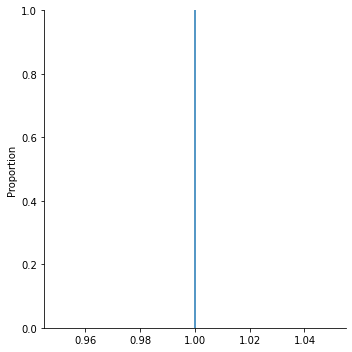

In [695]:
sns.displot(accuracy, kind="ecdf")
